In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
X = iris.data
y = iris.target

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
clf = DecisionTreeClassifier()

In [10]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
y_pred = clf.predict(X_test)

In [13]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [22]:
from sklearn.tree import plot_tree,export_text

[Text(0.4, 0.9, 'x[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [38, 42, 40]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 1.75\ngini = 0.5\nsamples = 82\nvalue = [0, 42, 40]'),
 Text(0.2, 0.5, 'x[2] <= 4.95\ngini = 0.127\nsamples = 44\nvalue = [0, 41, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(0.3, 0.3, 'x[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8, 0.5, 'x[2] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(0.7, 0.3, 'x[1] <= 3.1\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

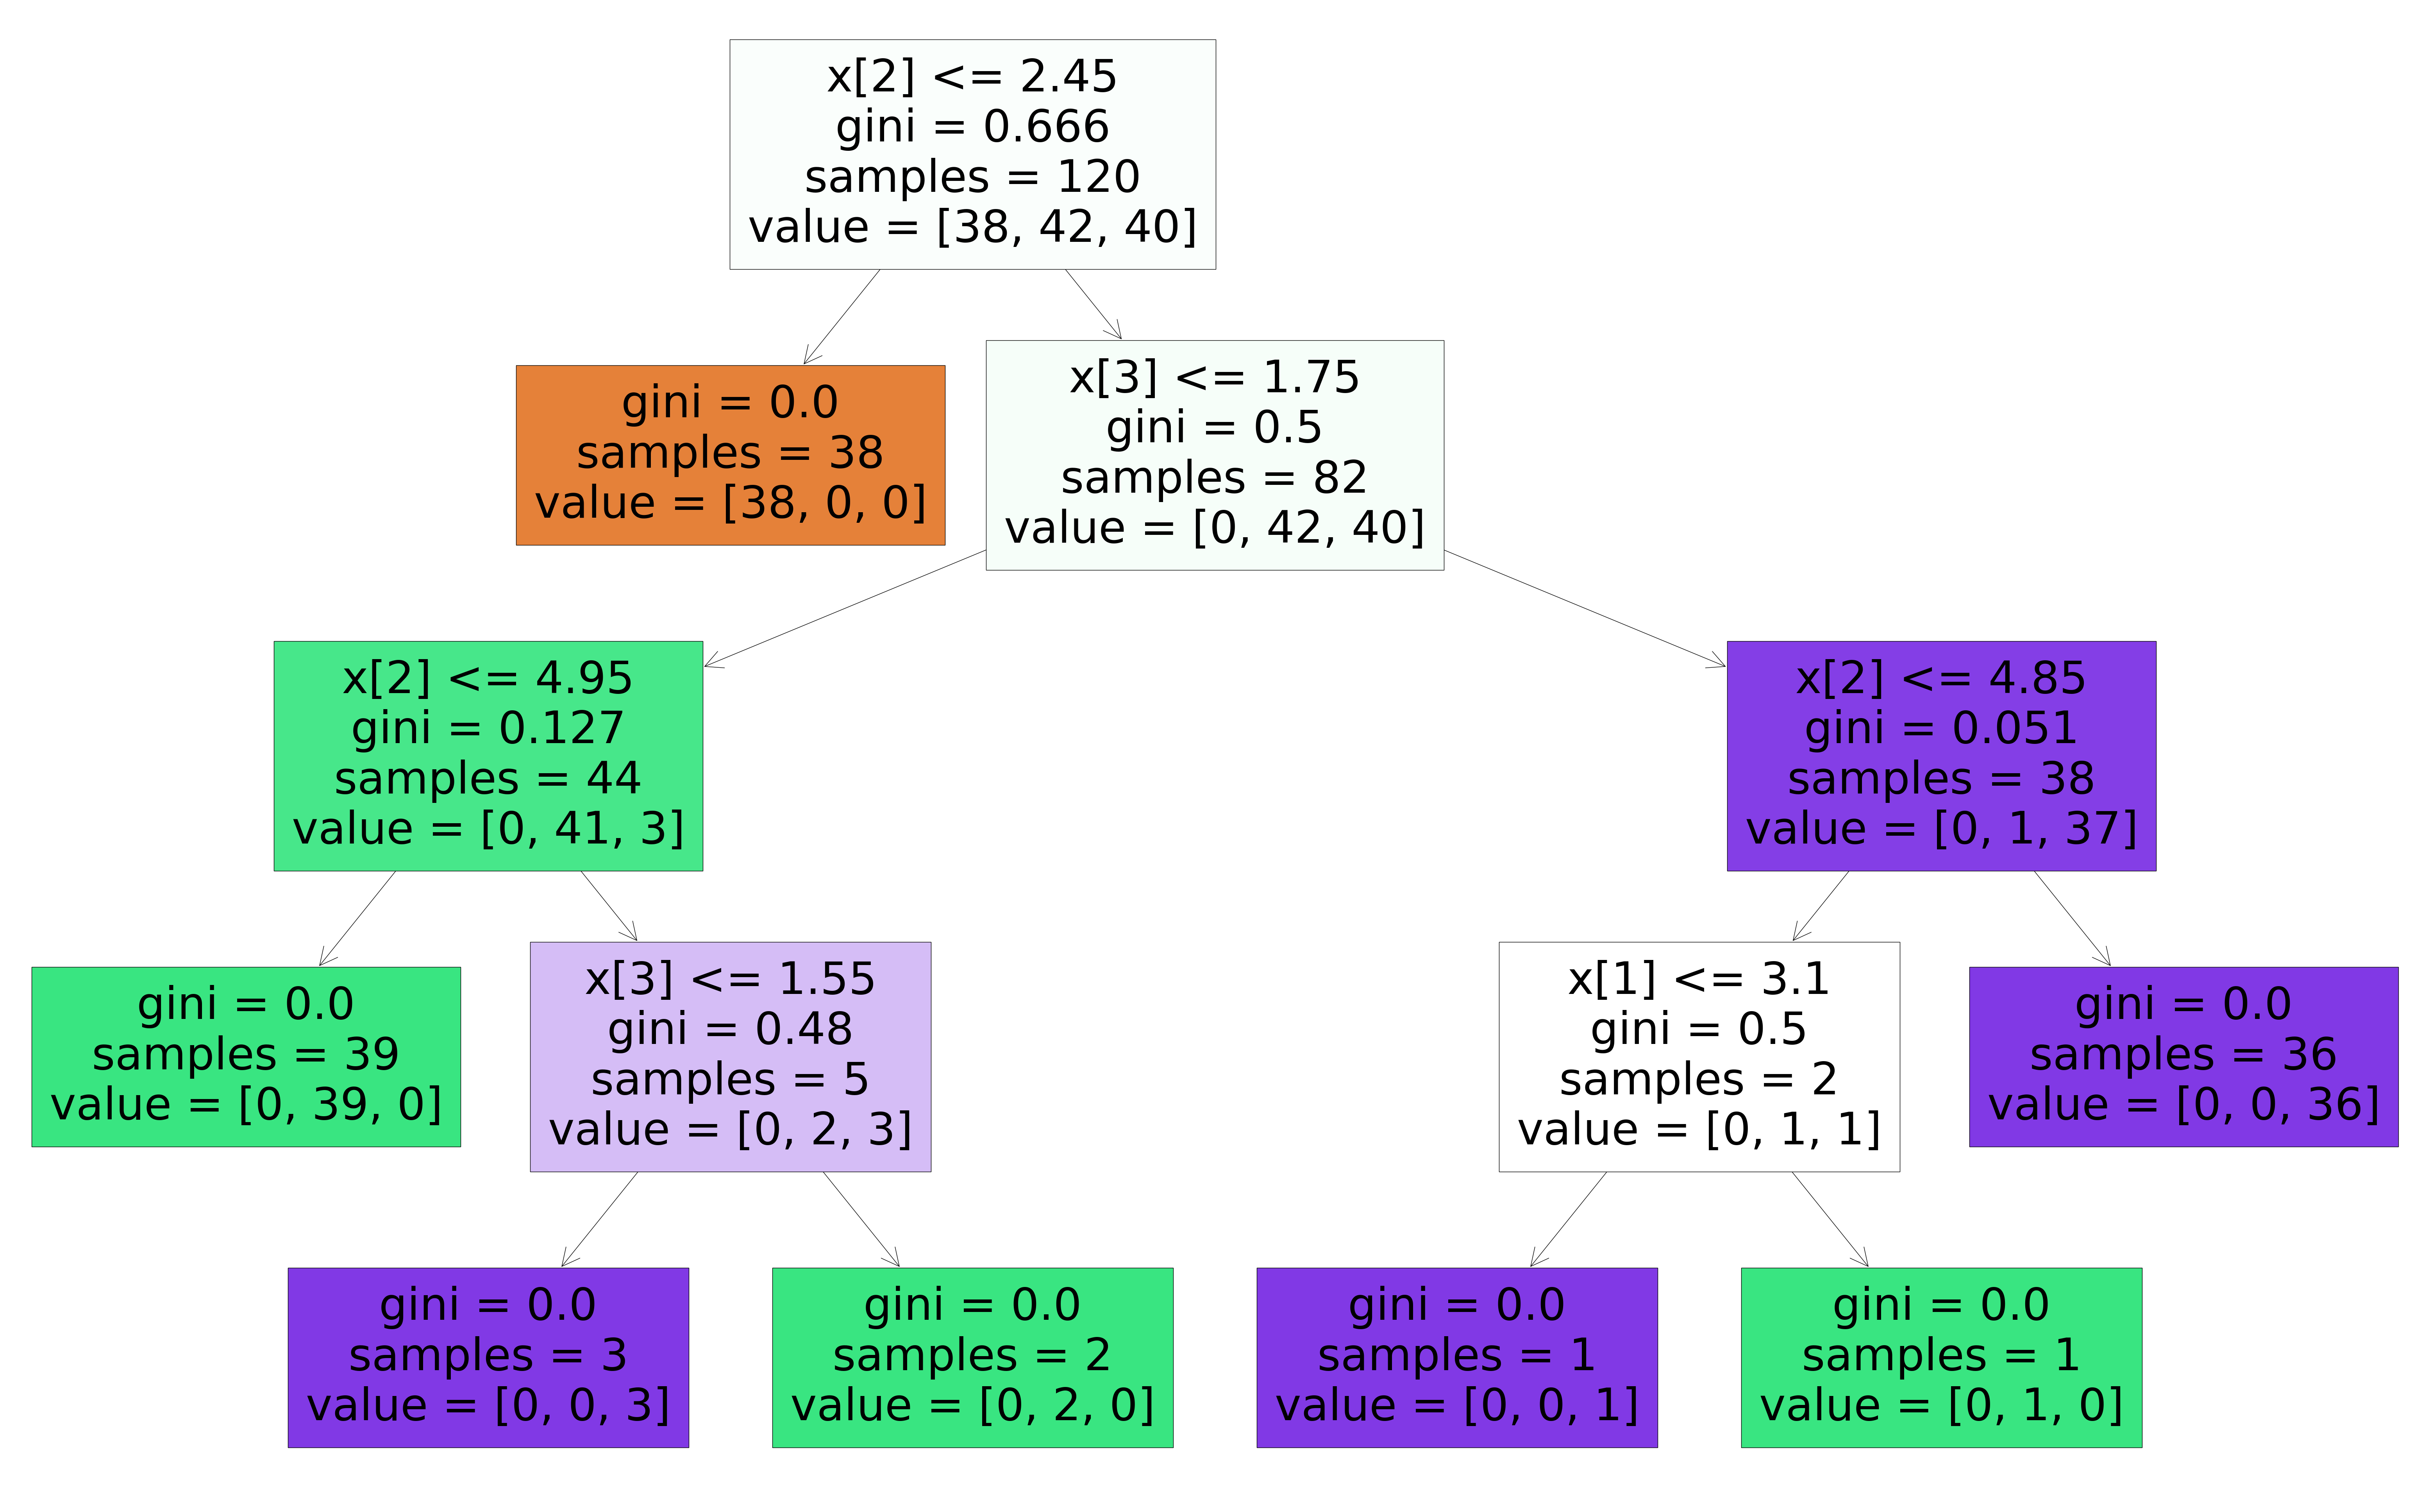

In [23]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50

plot_tree(clf, filled=True)

In [25]:
print(export_text(clf))

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [91]:
data = pd.read_csv('Social_Network_Ads.csv')

In [92]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [1]:
data['Gender'].replace({'Male':0,'Female':1},inplace=True)

NameError: name 'data' is not defined

In [94]:
X=data.iloc[:,1:4].values
y = data.iloc[:, -1].values

In [96]:
clf1 = DecisionTreeClassifier(max_depth=3)

In [97]:
clf1.fit(X,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[1] <= 42.5\ngini = 0.459\nsamples = 400\nvalue = [257, 143]'),
 Text(0.25, 0.625, 'x[2] <= 90500.0\ngini = 0.271\nsamples = 285\nvalue = [239.0, 46.0]'),
 Text(0.125, 0.375, 'x[1] <= 36.5\ngini = 0.072\nsamples = 241\nvalue = [232, 9]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 162\nvalue = [162, 0]'),
 Text(0.1875, 0.125, 'gini = 0.202\nsamples = 79\nvalue = [70, 9]'),
 Text(0.375, 0.375, 'x[2] <= 119000.0\ngini = 0.268\nsamples = 44\nvalue = [7, 37]'),
 Text(0.3125, 0.125, 'gini = 0.413\nsamples = 24\nvalue = [7, 17]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.75, 0.625, 'x[1] <= 46.5\ngini = 0.264\nsamples = 115\nvalue = [18, 97]'),
 Text(0.625, 0.375, 'x[2] <= 35500.0\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.5625, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.6875, 0.125, 'gini = 0.492\nsamples = 16\nvalue = [7, 9]'),
 Text(0.875, 0.375, 'x[2] <= 41500.0\ngini = 0.196\nsamples = 91\nvalue = [10,

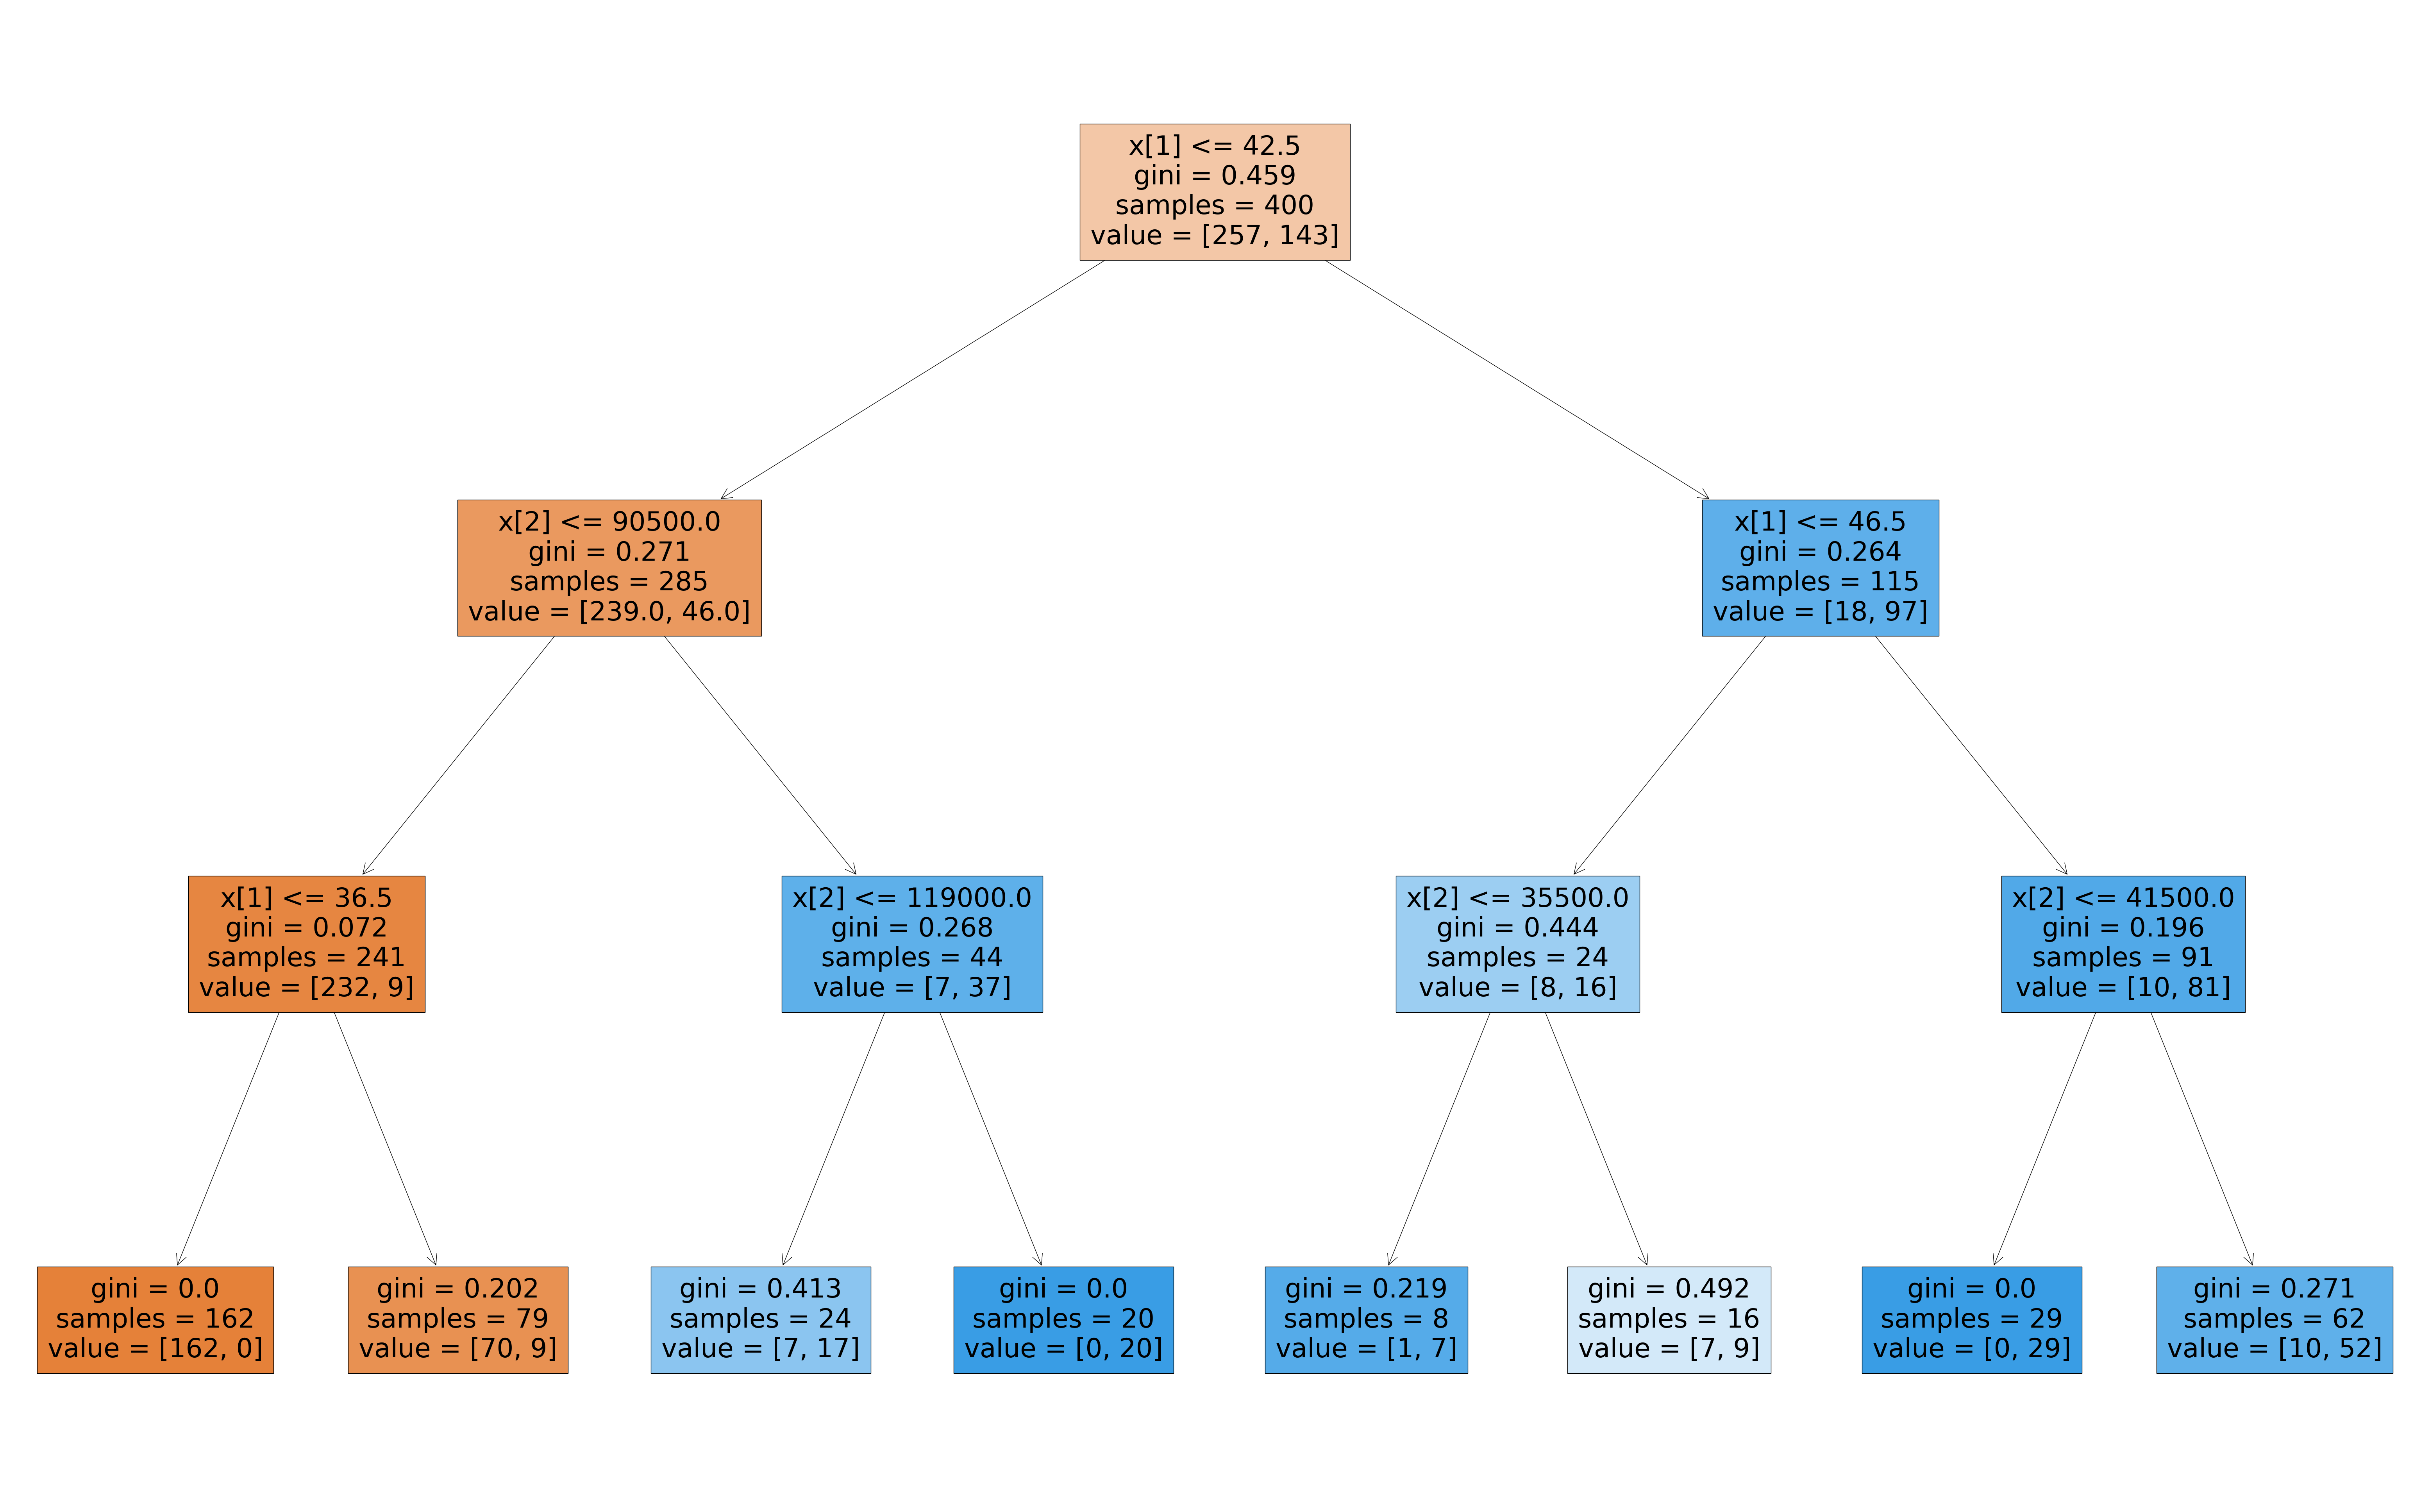

In [98]:
rcParams['figure.figsize'] = 80,50

plot_tree(clf1, filled=True)

In [78]:
print(export_text(clf1))

|--- feature_1 <= 42.50
|   |--- feature_2 <= 90500.00
|   |   |--- feature_1 <= 36.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  36.50
|   |   |   |--- feature_2 <= 83500.00
|   |   |   |   |--- feature_2 <= 67500.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  67500.00
|   |   |   |   |   |--- feature_2 <= 70500.00
|   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  70500.00
|   |   |   |   |   |   |--- feature_1 <= 41.50
|   |   |   |   |   |   |   |--- feature_1 <= 40.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 77500.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 38.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_1 >  38.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 71500.00
|   |   |   |   |   |   

In [79]:
data = data.head(10)

In [81]:
clf2 = DecisionTreeClassifier()

In [82]:
X=data.iloc[:,1:4].values
y = data.iloc[:, -1].values

In [83]:
clf2.fit(X,y)

DecisionTreeClassifier()

[Text(0.5, 0.75, 'x[2] <= 117000.0\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

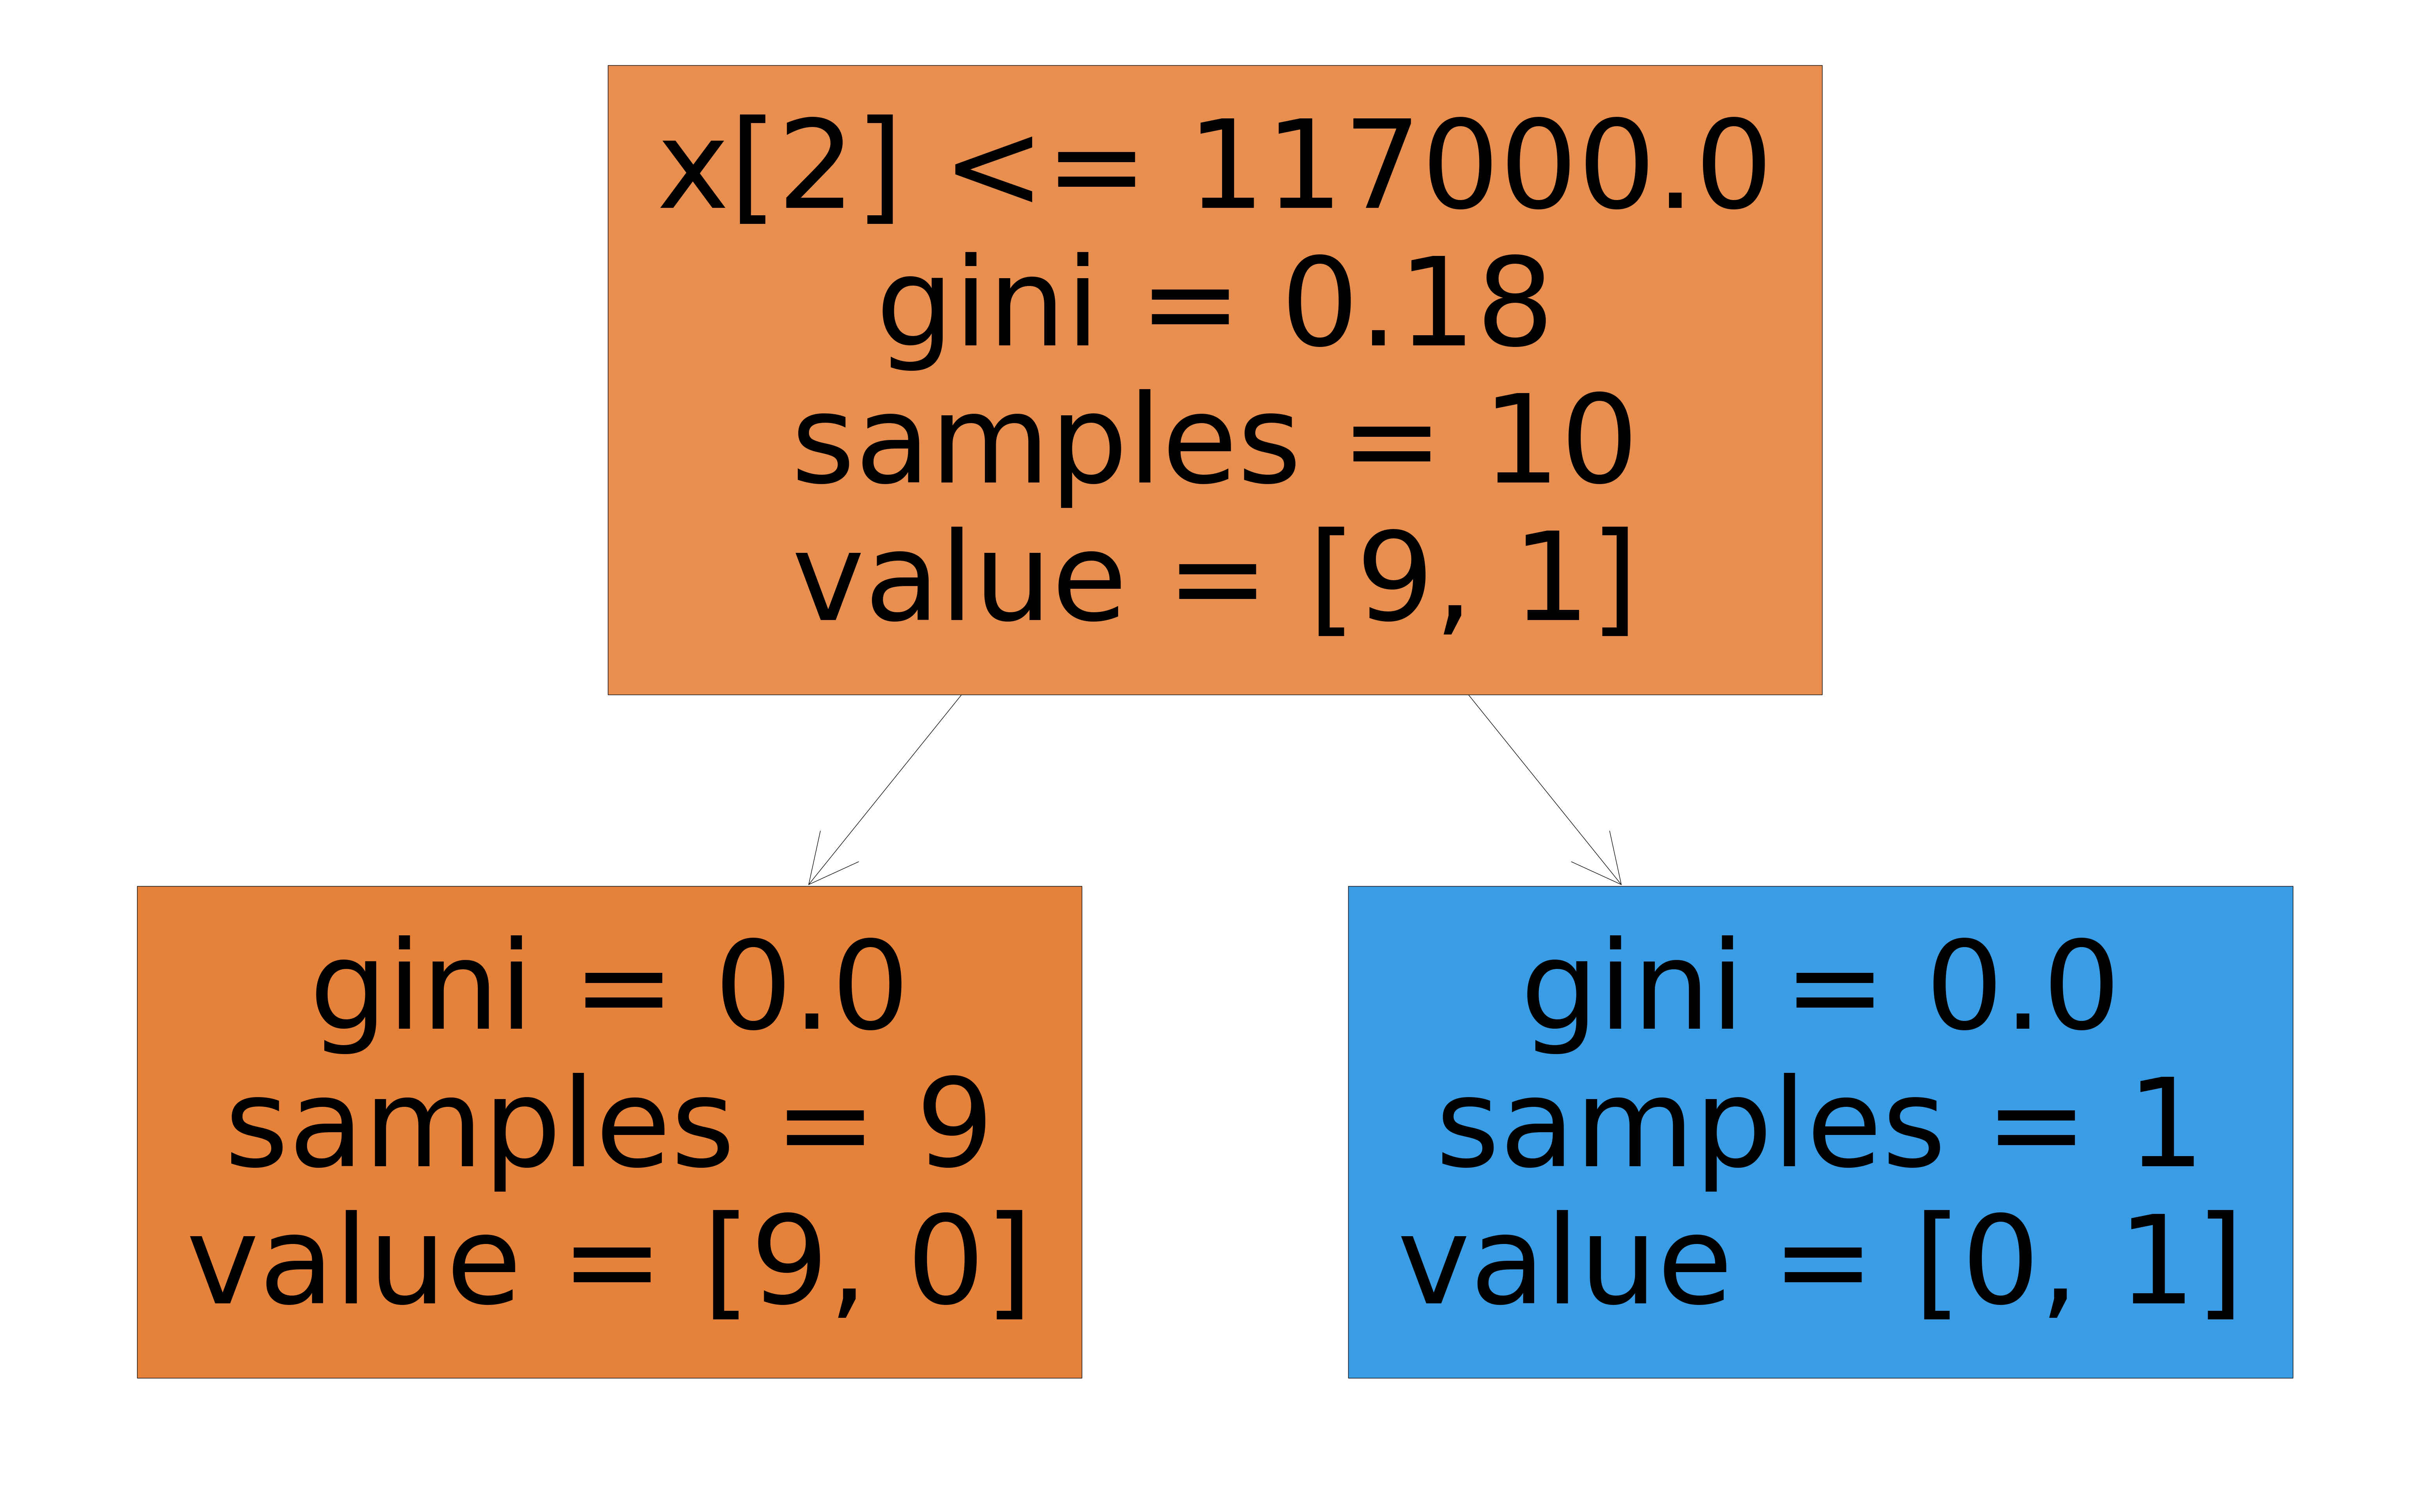

In [84]:
rcParams['figure.figsize'] = 80,50

plot_tree(clf2, filled=True)